In [2]:
## Exercises
import numpy as np
from function import *
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as si
import scipy.constants as CO
from matplotlib.lines import Line2D

/tmp/ipykernel_11513/292688812.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Week 1

##### Extra problem 7
A reminder on the semiempirical mass formula. Important: do not use the parameter values from the introductory course!

The semiemperical mass formula can be useful in many cases. Make a computer
macro/program (in Python, MATLAB or whatever program you prefer) that calculates the binding energy B in MeV for a given nucleus with mass number A, Z protons (and N neutrons), use equation (5.2) and the parameters given in the caption
of figure 5.1. Then test it by calculating B/A for four nuclei having mass numbers
50, 100, 150 and 200, and compare the result to figure 5.1. To select an appropriate
Z for each A (and to see how B/A varies for each A), do look into the experimental values: the latest mass values are collected in the file massround.mas20.txt
(downloaded from IAEA, references given in the header of the file, note that “mass
excess” is the atomic mass minus A·1u). Discuss the results and the B/A trends

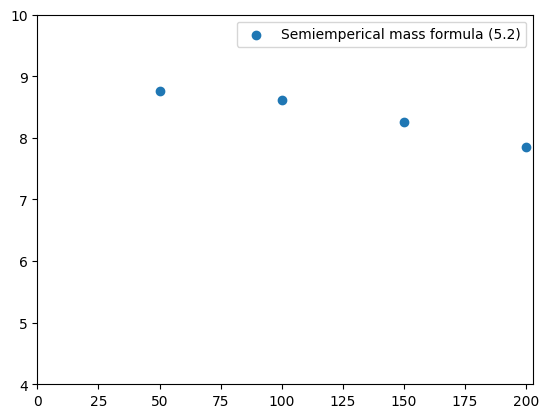

In [2]:
A = np.array([50,100,150,200])
Z = np.array([24,44,62,80]) #found in nuclear card

B_over_A = binding_E(A,Z)/A

fig, ax = plt.subplots()
ax.scatter(A,B_over_A, label = 'Semiemperical mass formula (5.2)')
ax.set_xlim(0,203)
ax.set_ylim(4,10)
ax.legend()

Kunne også sammenligne med rigtige ritige værdier for masser, bindingsenergier. Samt plottes alle isotoper for en N. 

Husk også at denne formel 5.2 er pæn når kvantemekaniske effektter ikke er medtaget (skalmodellen).Det er en god model hvis stemmeroverens med rigtige værdier fra masses20.dat, når modellen er så god kan man lave/snakke om størrelses ordner og derved kunne lave første estimationer af halveringstider osv. 

##### Exercise 6

In [3]:
E = 1
R = 2
V0 = E(1+1/np.tan())

TypeError: tan() takes from 1 to 2 positional arguments but 0 were given

# Week 3

## Extra Porblem 8

You saw in the introductory course that the semiemperical mass formula can be used
to give many useful estimates. Try this - analytically or numerically, as you prefer -
on the following two problems: (i) find out how to calculate the neutron separation
energy of a nucleus (equation (8.2)), when will ground state neutron emission be
possible in the heavy Na isotopes? (ii) find the Q-value for alpha emission, when
will this become positive for nuclei along the line of beta-stability (see problem 5.6;
use the experimental binding energy of 28.296 MeV for 4He)?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


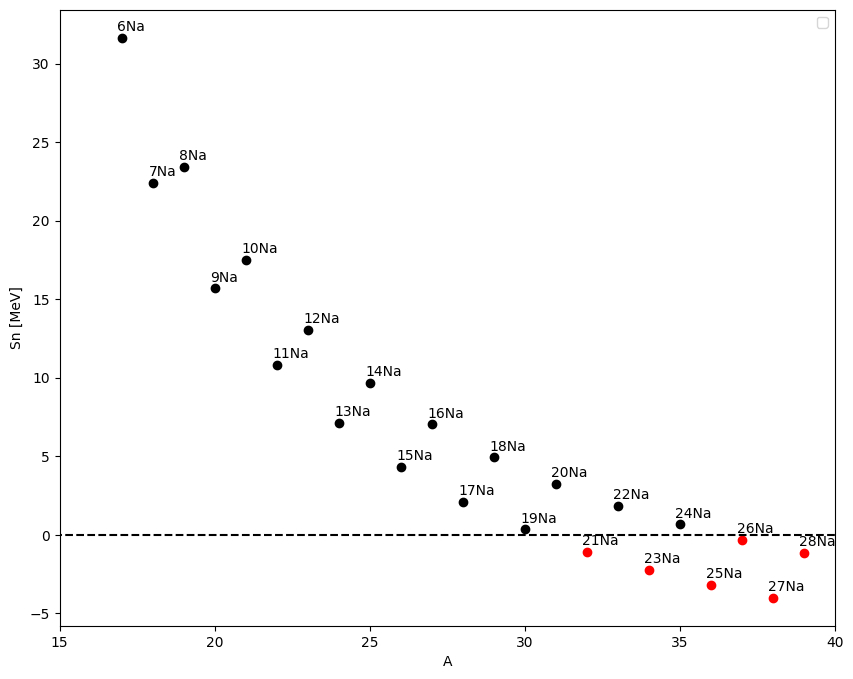

In [ ]:
# i)
fig, ax = plt.subplots(figsize=(10,8))
Z = 11
N = np.array([6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28])
A = N+Z
Sn = binding_E(A,Z)-binding_E(A-1,Z)

# plt.scatter(A,sn, color='blue')
plt.hlines(0,0,40, ls = 'dashed', color='k')
for a,n,sn in zip(A,N,Sn):
    if sn > 0:
        color = 'k'
    else:
        color = 'red'

    plt.scatter(a,sn,color=color)
    plt.annotate(f'{n}Na',(a,sn),textcoords="offset points", xytext=(-3,5))
    
plt.xlim(15,40)
plt.xlabel('A')
plt.ylabel('Sn [MeV]')
plt.legend()

Der obsereres en systematik, som kommer fra parring elementet i SEMF. Så øverste er lige, mens den nedre er ulige. Mest stabile har med paringen at gøre. 

Det assymetriske led gør at når der er mange neutroner så vil bindingsenergien falde, altså bliver kernen mindre og mindre stabil, mere ustabil.

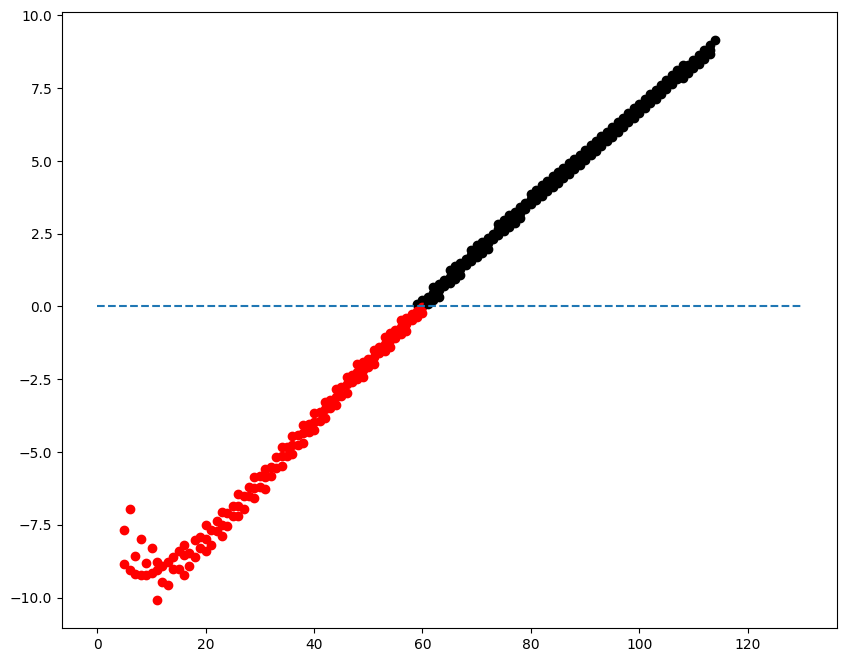

In [ ]:
## ii)
fig, ax = plt.subplots(figsize=(10,8))

A = np.linspace(10,300,291)
beta_stability = A/(1.97+0.015*A**(2/3))
Zs_beta_stability = np.round(beta_stability)
Qalpha = Q_alpha(A,Zs_beta_stability)

for zs, qa in zip(Zs_beta_stability,Qalpha):
    if qa<0:
        color = 'red'
        
    else:
        color = 'k'
    
    plt.scatter(zs,qa,color = color)
plt.hlines(0,0,130, ls = 'dashed')

### Execise 9

Lige og ulige effekter, ingen stabile for 43=z hvis skal effekter er med. Hvis bare SEMF er der ike skal effekter, så har optræder alle protoner Z som hadende en stabil udgave.

In [ ]:
A = np.linspace(10,300,291)
beta_stability = A/(1.97+0.015*A**(2/3))
sn = binding_E(A,Z)-binding_E(A-1,Z)


In [ ]:
f = open('massround.mas20.txt','r')
out = f.readlines() 
line = out[33]
lines = out[34:]
elements = correct_missing_values_in_str(lines)

import pandas as pd
cols = ['NZ', 'N',  'Z', 'A' ,   'el','o',    'mass' , 'unc', 'binding', 'unc',     'B' , 'beta',  'unc' ,  'atomic_mass_first', 'atomic_mass_second',   'unc']
df = pd.DataFrame((elements),columns=cols)
df[['Z', 'N', 'A']] = df[['Z', 'N', 'A']].astype(int)


zs_beta_stability = df['A']/(1.97+0.015*df['A']**(2/3))
zs = np.round(zs_beta_stability)


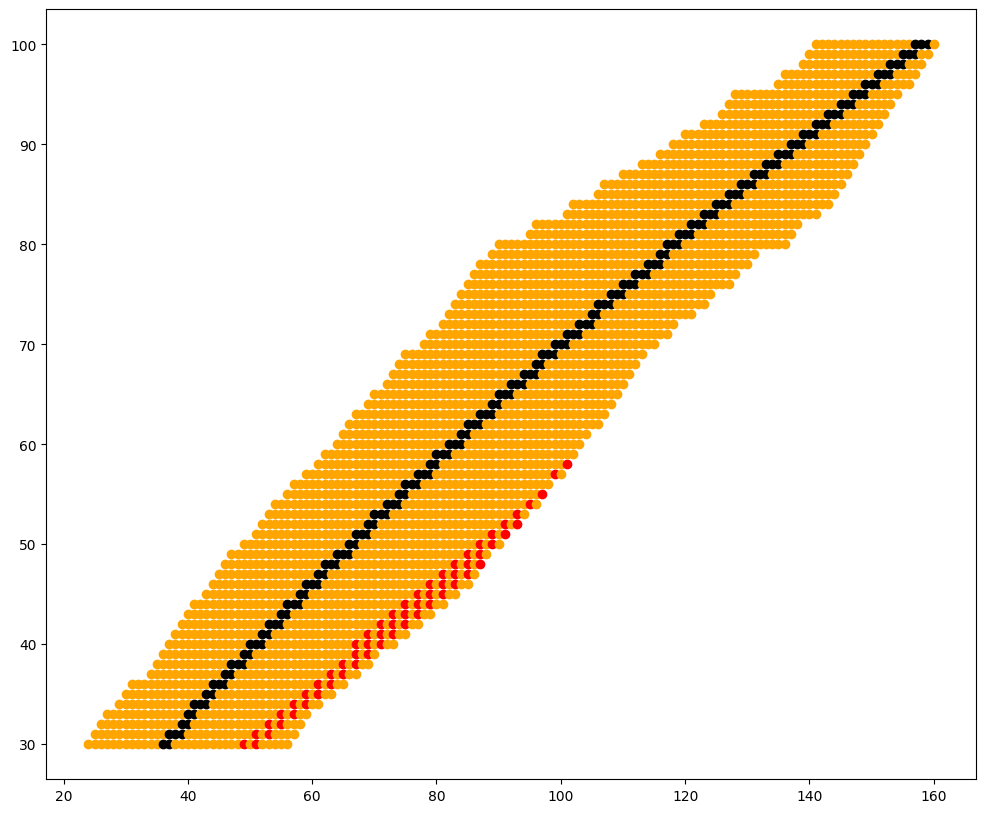

In [ ]:
fig, ax = plt.subplots(figsize = (12,10))

# plt.scatter(df['Z'],df['N'], color = 'yellow',alpha = 0.99, s = 3)
# plt.scatter(zs,df['A']-zs,color = 'k', s = 3)

for a,z,n,z_stabil in zip(df['A'],df['Z'],df['N'],zs):
    if z>=30 and z<=100:
        if z==z_stabil:
            color = 'k'
        if z!=z_stabil:
            color = 'orange'

        sn = binding_E(a,z)-binding_E(a-1,z)
        if sn>2 and sn<3:
            color = 'red'
        plt.scatter(n,z,color = color)
        
    

# Week 4

### Exercise (problem 6)

In [3]:
PC = CO.physical_constants
hbarc = CO.hbar*CO.c*6.242e27 #eV nm
me = PC['electron mass energy equivalent in MeV'][0] #in MeV
mp = PC['proton mass energy equivalent in MeV'][0]
mn = PC['neutron mass energy equivalent in MeV'][0]
m = PC['deuteron mass energy equivalent in MeV']

In [4]:
## NUmerical solution ii) to shcrodinger eq. 
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


# Define parameters
R = 2.  # Boundary of the potential well
V0 = 10
E = 20

def inside_wave_ode(r,u,k):
    k = np.sqrt((2.*mn/hbarc**2)*(V0+abs(E)))
    return [u[1],-k**2*u[0]]
    

def outside_wave_ode(r,u,q):
    q = np.sqrt((2.*mn/hbarc**2)*abs(E))
    return [u[1],q**2*u[0]]
    
r_in = [0,R]
r_out = [0,10]
u0 = [0, 1]
sol1 = solve_ivp(lambda r, u: inside_wave_ode(r,u,k), r_in, u0, t_eval = np.linspace(0,R,100))
sol2 = solve_ivp(lambda r, u: outside_wave_ode(r,u,q), r_out, u0, t_eval = np.linspace(0,3,100))

# plt.
plt.plot(sol1.t, sol1.y[0], label='u1(r)')
plt.plot(sol2.t, sol2.y[1], label='u2(r)')
plt.xlabel('r')
plt.ylabel('u')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'k' is not defined

In [5]:
print(sol2)

NameError: name 'sol2' is not defined

/tmp/ipykernel_11513/3752961501.py:12: RuntimeWarning: invalid value encountered in sqrt
  y2 = np.sqrt(z0**2 / z**2 - 1)
/tmp/ipykernel_11513/3752961501.py:21: RuntimeWarning: invalid value encountered in sqrt
  return -(np.cos(z) / np.sin(z)) - np.sqrt(z0**2 / z**2 - 1)
/tmp/ipykernel_11513/3752961501.py:24: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  intersection_points = [fsolve(equations, z_guess_i)[0] for z_guess_i in z_guess]


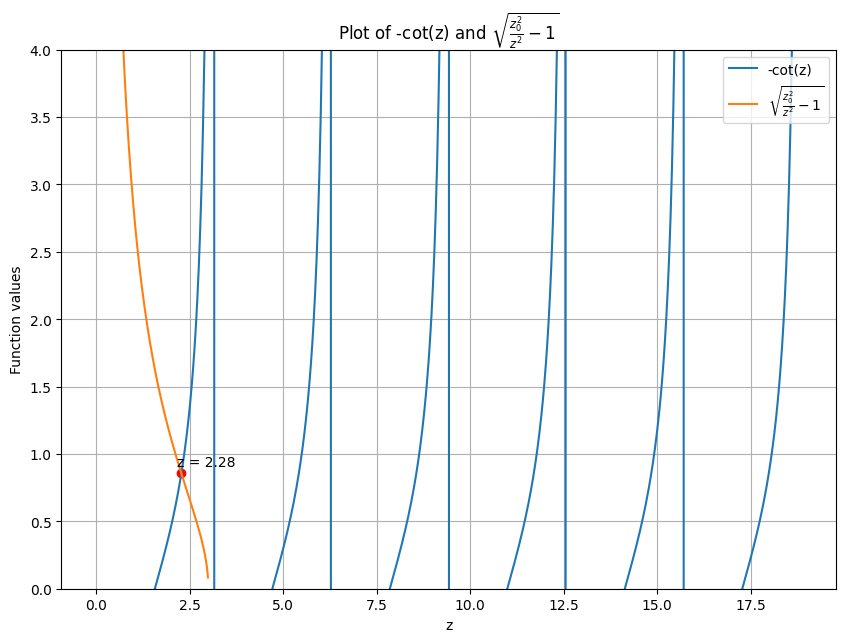

Intersection points (z): [2.2788626600758284, 3.0, 4.5]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

plt.figure(figsize=(10,7))

z = np.linspace(0.01, 6 * np.pi, 1000)
R = 2
z0 = 3

y1 = -(np.cos(z) / np.sin(z))
y2 = np.sqrt(z0**2 / z**2 - 1)

plt.plot(z, y1, label='-cot(z)')
plt.plot(z, y2, label=r'$\sqrt{\frac{z_0^2}{z^2}-1}$')
plt.legend(loc='upper right', fontsize=18)
plt.ylim(0, 4)

# Find intersection points
def equations(z):
    return -(np.cos(z) / np.sin(z)) - np.sqrt(z0**2 / z**2 - 1)

z_guess = [1.5, 3, 4.5]  # Initial guess for intersection points
intersection_points = [fsolve(equations, z_guess_i)[0] for z_guess_i in z_guess]
intersection_y = [-np.cos(z) / np.sin(z) for z in intersection_points]
# Plot intersection points
for z, inter in zip(intersection_points, intersection_y):
    plt.scatter(z,inter, color='red')
    plt.annotate(f'z = {z.round(2)}',(z,inter),textcoords="offset points", xytext=(-3,5))

plt.legend(loc = 'upper right')
plt.xlabel('z')
plt.ylabel('Function values')
plt.title('Plot of -cot(z) and $\sqrt{\\frac{z_0^2}{z^2}-1}$')
plt.grid(True)
plt.show()

print("Intersection points (z):", intersection_points)


In [7]:
v0 =z0**2*197.3269788**2/(2*(m[0])*R**2)
E = -v0-R**2/2.2788626600758284**2*CO.hbar**2*1/(2*m[0])

In [8]:
print(f'v0 = {v0}, E = {E}')

v0 = 23.355127083205623, E = -23.355127083205623


/tmp/ipykernel_11513/2182547254.py:2: RuntimeWarning: invalid value encountered in sqrt
  q = np.sqrt((2.*mn/hbarc**2)*(E))


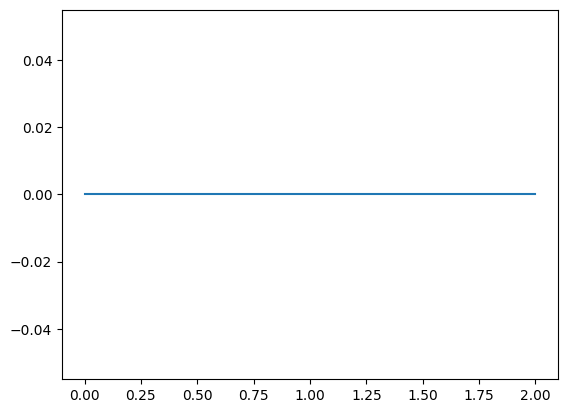

In [9]:
k = np.sqrt((2.*mn/hbarc**2)*(v0+(E)))
q = np.sqrt((2.*mn/hbarc**2)*(E))

r_out = np.linspace(R,6,1000)
r_in = np.linspace(0,R,1000)
u1 = np.sin(k*r_in)
u2 = np.exp(-q*r_out)

plt.plot(r_in,u1)
plt.plot(r_out,u2)
plt.show()




In [10]:
m

(1875.61294257, 'MeV', 5.7e-07)

/tmp/ipykernel_11513/1520154817.py:4: RuntimeWarning: divide by zero encountered in divide
  y1 = -x*(1/np.tan(x))
/tmp/ipykernel_11513/1520154817.py:4: RuntimeWarning: invalid value encountered in multiply
  y1 = -x*(1/np.tan(x))


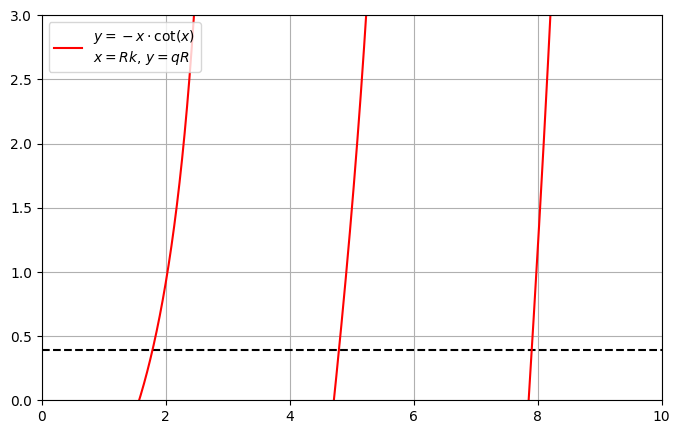

In [11]:
plt.figure(figsize=(8,5))
R = 1.7
x = np.linspace(0, 10, 100000)
y1 = -x*(1/np.tan(x))
y1[:-1][np.diff(y1) < 0] = np.nan
# a = np.array([np.pi/4, np.pi/2, 3/4*np.pi, np.pi,np.pi*5/4,np.pi*3/2,7/4*np.pi,np.pi*2])
# rs = np.array([r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$',r'$5\pi/4$',r'$3\pi/2$',r'$7\pi/4$',r'$2\pi$'])
# colors = ['b','g','y','k','r','m','c','orange']
# for aes, colors,name in zip(a, colors,rs):
#     y2 = np.sqrt(-x**2+aes**2)
#     # plt.plot(x,y2, ls = 'dashed', c = colors, label = f'a = {name}',lw = 2)
#     plt.plot(x,y2, ls = 'dashed', c='k')
#     plt.annotate(f'a = {name}',(x[5],y2[5]),textcoords="offset points", xytext=(-3,5))
ed = 2.225 #MeV
y=np.sqrt(2*(mp/2)/hbarc**2*ed)*R
plt.hlines(y,0,10, ls = 'dashed', color = 'k')
plt.plot(x,y1, ls= 'solid', c = 'r', label = r'$y=-x\cdot \cot(x)$'+'\n'+r'$x = Rk$, $y = qR$')
# plt.plot(x,y2)
plt.ylim(0,3)
plt.xlim(0,10)
plt.grid()
plt.legend(loc = 'upper left')

In [12]:
from scipy.optimize import fsolve
import scipy.optimize as so
f = lambda x: -x*(1/np.tan(x))-y
R = 1.7
ed = 2.225
x0 = so.brentq(f, 1,2.3, xtol=2e-12, rtol=8.881784197001252e-16, maxiter=100, full_output=False, disp=True)
print(f'x at ground state = {x0}')


x at ground state = 1.7875310077038968


In [13]:
k = x0/R
v0 = ed-((hbarc**2*k**2)/(2*mp/2))
print(v0)
# k = np.sqrt((2.*(mp/2)/hbarc**2)*(v0+(ed)))
print('k    = ',k)
q = np.sqrt((2.*(mp/2)/hbarc**2)*(ed))
print('q    = ',q)
A=1
D = A*np.sin(k*R)/np.exp(-q*R)
D1 = 1
A = ((2*np.pi-D**2/(2*q)*np.exp(-2*q*R))*(1/(R-1/(2*k)*np.sin(2*k*R))))**(1/2)

-43.66539385370834
k    =  1.0514888280611159
q    =  0.23153080292508105


In [14]:
def eqs(p):
    A,D = p
    return (A*np.sin(k*R)/np.exp(-q*R)-D,1/2*(A**2*(R-1/(2*k)*np.sin(2*k*R))+D**2/(q)*np.exp(-2*q*R))-1)

A, D = fsolve(eqs, (1,1))

print(A,D)

0.5764344783450613 0.8344650553319773


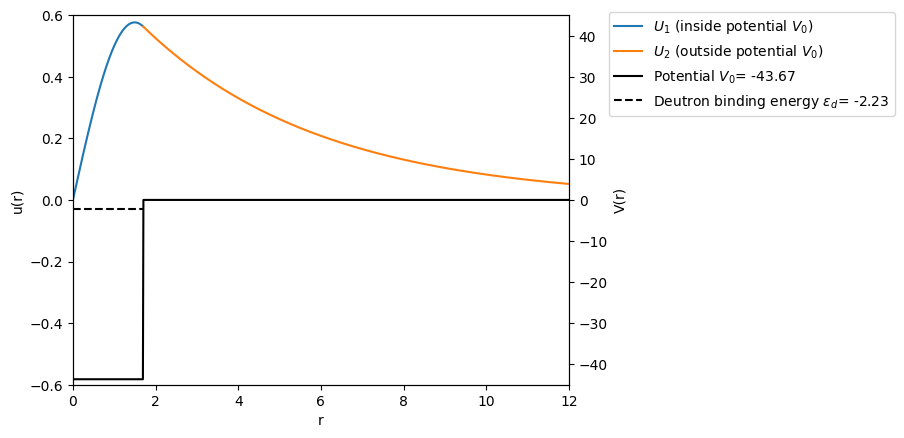

In [15]:
fig, ax = plt.subplots()
r_out = np.linspace(R,12,1000)
r_in = np.linspace(0,R,1000)
rs = np.linspace(0,12,1000)
u1 = A*np.sin(k*r_in)
u2 = D*np.exp(-q*r_out)

def potential(x):
    if x<R:
        v=v0
    if x>R or x<0:
        v=0
    return v

vs = [potential(x) for x in rs]
ax.plot(r_in,u1,label =r'$U_{1}$ (inside potential $V_0$)')
ax.plot(r_out,u2,label =r'$U_{2}$ (outside potential $V_0$)')
ax.set_ylim(-0.6,0.6)
ax2 = ax.twinx()
ax2.plot(rs,vs, label = r'Potential $V_0$'+f'= {round(v0,2)}', ls = 'solid',color = 'k')
ax2.hlines(-ed,0,R,ls='dashed',color='k', label =r'Deutron binding energy $\epsilon_d$'+f'= {round(-ed,2)}')
ax2.set_ylim(-45,45)
ax.set_xlim(0,12)
ax.set_xlabel('r')
ax.set_ylabel('u(r)')
ax2.set_ylabel('V(r)')

fig.legend(bbox_to_anchor = (1.42,0.9))

In [16]:
def integrand (x,A,D):
    if x<=R:
        return A**2*(np.sin(k*x))**2
    if x>R:
        return D**2*np.exp(-2*q*x)
from scipy.integrate import quad
I = quad(integrand,0,+np.inf,args=(A,D))
print(round(I[0],4))

1.0


A: 25  V0: 40  l: 0
[-31.278799999999997, -7.198400000000003]
A: 50  V0: 40  l: 0
[-34.1176, -17.0791]
A: 75  V0: 40  l: 0
[-35.3594, -21.7455, -1.4931]
A: 100  V0: 40  l: 0
[-36.088, -24.543300000000002, -6.4591]
A: 125  V0: 40  l: 0
[-36.5778, -26.4441, -10.266300000000001]
A: 150  V0: 40  l: 0
[-36.934599999999996, -27.836899999999996, -13.165899999999999]
A: 175  V0: 40  l: 0
[-37.208499999999994, -28.9106, -15.4451]
A: 200  V0: 40  l: 0
[-37.4268, -29.769, -17.288700000000002, -1.3560999999999985]


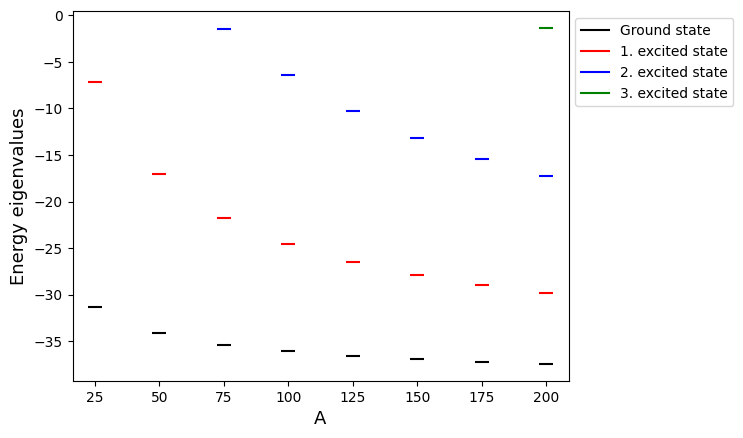

In [17]:
#  Python version of Jacob Johansen's square-well program   19/5-2020
#
#  The program calculates energy eigenvalues for a neutron in a square well
#  nuclear potential with radius R = 1.4 * A^(1/3) fm
#  Units  -  MeV, fm
#  Input:     all scalar
#    V0 - depth of the well in MeV
#    A  - total number of nucleons for the potential
#    l  - angular momentum
#  Output:
#    E  - energy eigenvalues

import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc

# numerical constants - PDG 2018
hbarc = 197.3269788
me = 0.510998946
mp = 938.272081
mn = 939.565413
finest = 1/137.03599914

mhbar = 2.*mn/hbarc**2

# first version, input values  -  could be expanded later...
V0 = 40.
#V0 = float(input('Give V0: '))
#A = 100
# A = int(input('Give A value: '))
# A = 10
l = 0
#l = int(input('Give l value: '))

#  find energies in E-list just below a fullfilled matching condition
def zeropoint(E,V0,A,l):
    r0 = 1.4*A**(1./3.)
    kr = np.sqrt(mhbar*(V0-abs(E)))*r0
    kapr = np.sqrt(mhbar*abs(E))*r0
    indre = kr*sc.spherical_jn(l,kr,derivative=True)/sc.spherical_jn(l,kr)
    ydre = kapr*sc.spherical_kn(l,kapr,derivative=True)/sc.spherical_kn(l,kapr)
    egenligning = indre - ydre
    signchange = egenligning[0:len(E)-1]*egenligning[1:len(E)]
    # signchange is small and negative at matching points, but also large
    #   when "the tangent diverges"...
    eresult = []
    [eresult.append(E[i]) for i in range(len(E)-1) if signchange[i]<0 and abs(egenligning[i])<10]
    # this construction is equivalent to the following lines...
    #for i in range(len(E)-1):
    #    if signchange[i]<0 and abs(egenligning[i])<10:
    #         eresult.append(E[i])
    return eresult

def find_E(A,V0):
    # first find all solutions with 0.1 MeV resolution
    E1 = np.linspace(-1*V0+.1,-0.1,10*int(V0)-1)
    Eres = zeropoint(E1,V0,A,l)
    #print(Eres)

    # then refine each solution to 0.1 keV
    Efinal = []
    for j in range(len(Eres)):
        E2 = np.linspace(Eres[j],Eres[j]+0.1,num=1000,endpoint=False)
        Ehelp = zeropoint(E2,V0,A,l)
        Efinal.append(Ehelp[0])

    print('A:',A,' V0:',V0,' l:',l)
    return Efinal


As = np.array([25,50,75,100,125,150,175,200])
cols = ['k','r','b','g']
V0 = 40
e0s = []
for i in As:
    result = find_E(i,V0)
    print(result)
    e0s.append(result[0])
    j = 0
    for results in zip(result):
        plt.scatter(i,results,color=cols[j], marker='_', s = 100)
        j+=1
plt.xlabel('A', fontsize=13)
plt.ylabel('Energy eigenvalues', fontsize=13)
handles = []
labels = ['Ground state', '1. excited state','2. excited state','3. excited state']
for i in range(4):
    line = Line2D([0], [0], label=labels[i], color=cols[i])
    handles.append(line)
plt.legend(handles=handles, bbox_to_anchor = (1,1))



In [18]:

def eqs(p):
    A,D = p
    return (A*np.sin(k*R)/np.exp(-q*R)-D,1/2*(A**2*(R-1/(2*k)*np.sin(2*k*R))+D**2/(q)*np.exp(-2*q*R))-1)

def integrand (x,A,D):
    if x<=R:
        return A**2*(np.sin(k*x))**2
    if x>R:
        return D**2*np.exp(-2*q*x)
    
from scipy.integrate import quad


----A---- 25
R =  4.093624833498012
Normalized (int under wave function):  1.0
----A---- 50
R =  5.157644098096541
Normalized (int under wave function):  1.0
----A---- 75
R =  5.904028657112243
Normalized (int under wave function):  1.0
----A---- 100
R =  6.498224367057889
Normalized (int under wave function):  1.0
----A---- 125
R =  6.999999999999998
Normalized (int under wave function):  1.0
----A---- 150
R =  7.438609984278276
Normalized (int under wave function):  1.0
----A---- 175
R =  7.830822594569777
Normalized (int under wave function):  1.0
----A---- 200
R =  8.187249666996022
Normalized (int under wave function):  1.0


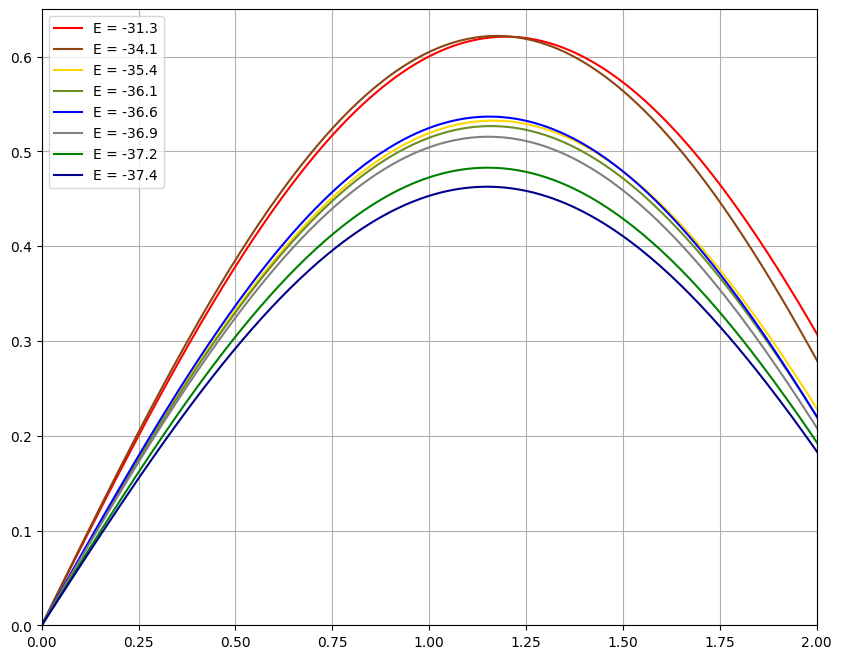

In [25]:
fig = plt.figure(figsize=(10,8))
colors = ['red','saddlebrown','gold','olivedrab','blue','grey','green','darkblue']

v0 = 40 
i=0
for energy_b, col in zip(e0s,colors):
    A_ = As[i]
    print('----A----',A_)
    ed = -energy_b
    R= 1.4*A_**(1./3.)
    print('R = ',R)
    r_out = np.linspace(R,10,1000)
    r_in = np.linspace(0,R,1000)    
    k = np.sqrt((2.*(mn/2)/hbarc**2)*(v0+(ed)))
    q = np.sqrt((2.*(mn/2)/hbarc**2)*(ed))
    
    A, D = fsolve(eqs, (1,7))
    u1 = A*np.sin(k*r_in)
    u2 = D*np.exp(-q*r_out)
    I = quad(integrand,0,+np.inf,args=(A,D))
    print('Normalized (int under wave function): ' , round(I[0],4))
    
    plt.plot(r_in,u1, color = col, label = f'E = {round(energy_b,1)}')
    plt.plot(r_out,u2, color = col)
    plt.vlines(R,-1,1, color = col, ls = 'dashed')
    i+=1

# plt.xlim(R-0.05,R+0.05)
# plt.vlines(R,0,1, ls = 'dashed')
plt.ylim(0,0.65)
plt.xlim(0,2)
plt.legend()
plt.grid()
plt.show()


In [ ]:
def integrand (x,A,D):
    if x<=R:
        return A**2*(np.sin(k*x))**2
    if x>R:
        return D**2*np.exp(-2*q*x)
from scipy.integrate import quad
I = quad(integrand,0,+np.inf,args=(A,D))
print(round(I[0],4))

1.0


In [21]:
## c) (ii)

def E_infinite(A,n):
    R = 1.4*A**(1./3.)
    E = []
    
    for ns in n:
        E.append(ns**2*np.pi**2*hbarc**2/(2*mn*R**2))
        
    return E

Es_infinite = [E_infinite(A,[1,2,3,4]) for A in As]

A: 25  V0: 40  l: 0
A: 50  V0: 40  l: 0
A: 75  V0: 40  l: 0
A: 100  V0: 40  l: 0
A: 125  V0: 40  l: 0
A: 150  V0: 40  l: 0
A: 175  V0: 40  l: 0
A: 200  V0: 40  l: 0


Text(0.5, 1.0, 'Infinite Square Well/ FInite Square Well')

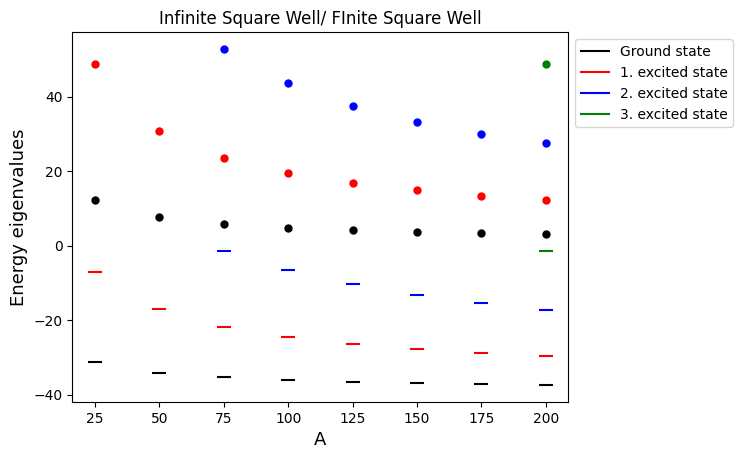

In [23]:
cols = ['k','r','b','g']
V0 = 40

for i, Es_ in zip(As,Es_infinite):
    j= 0
    result = find_E(i,V0)
    for (e,results) in zip(Es_,result):
        plt.scatter(i,e,color=cols[j], marker='.', s = 100)
        plt.scatter(i,results,color=cols[j], marker='_', s = 100)
        j+=1
plt.xlabel('A', fontsize=13)
plt.ylabel('Energy eigenvalues', fontsize=13)
handles = []
labels = ['Ground state', '1. excited state','2. excited state','3. excited state']
for i in range(4):
    line = Line2D([0], [0], label=labels[i], color=cols[i])
    handles.append(line)
plt.legend(handles=handles, bbox_to_anchor = (1,1))
plt.title('Infinite Square Well/ FInite Square Well')